### prediction Risky Drivers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('seguro_train.csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [5]:
df['ps_ind_04_cat'].value_counts()

 0    346965
 1    248164
-1        83
Name: ps_ind_04_cat, dtype: int64

In [6]:
df['ps_calc_15_bin'].value_counts()

0    522342
1     72870
Name: ps_calc_15_bin, dtype: int64

In [7]:
df['ps_car_01_cat'].value_counts()

 11    207573
 7     179247
 6      62393
 10     50087
 4      26174
 9      20323
 5      18142
 8      15093
 3       6658
 0       5904
 2       2144
 1       1367
-1        107
Name: ps_car_01_cat, dtype: int64

note:- the organization is using -1 as a flag for missing

In [8]:
cols=list(df.columns)

df=np.where(df==-1,np.NaN,df)
df=pd.DataFrame(df,columns=cols)

In [10]:
ms=df.isnull().sum()
ms[ms>0]/len(df)

ps_ind_02_cat    0.000363
ps_ind_04_cat    0.000139
ps_ind_05_cat    0.009760
ps_reg_03        0.181065
ps_car_01_cat    0.000180
ps_car_02_cat    0.000008
ps_car_03_cat    0.690898
ps_car_05_cat    0.447825
ps_car_07_cat    0.019302
ps_car_09_cat    0.000956
ps_car_11        0.000008
ps_car_12        0.000002
ps_car_14        0.071605
dtype: float64

In [11]:
df=df.drop(['ps_car_03_cat','ps_car_05_cat'],axis=1)

In [14]:
cols=list(df.columns)
cat_cols=[]

for col in cols:
    if 'cat' in col:
        cat_cols.append(col)
cat_cols        

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [17]:
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [18]:
df=df.fillna(method='ffill')

In [19]:
ms=df.isnull().sum()
ms[ms>0]/len(df)

Series([], dtype: float64)

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.359668,0.663108,1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416934,0.493052,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.414948,1.344050,0.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


### EDA- Bivariate

#### ps_ind_06_bin(bin vs bin)

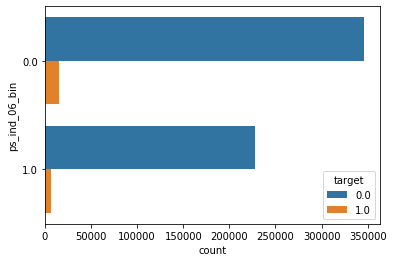

In [23]:
sns.countplot(y='ps_ind_06_bin',hue='target',data=df)
plt.show()

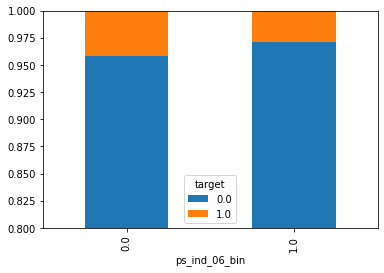

In [28]:
ct=pd.crosstab(df['target'],df['ps_ind_06_bin'],normalize=1).T
ct.plot.bar(stacked=True)
plt.ylim(0.8,1)
plt.show()

#### ps_cals_01(binary vs continuous)

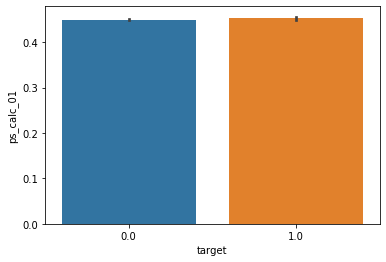

In [30]:
sns.barplot(x='target',y='ps_calc_01',data=df)
plt.show()

#### ps_car_13(binary vs continuous)

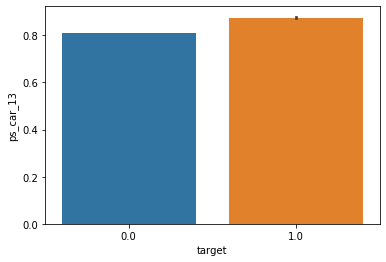

In [31]:
sns.barplot(x='target',y='ps_car_13',data=df)
plt.show()

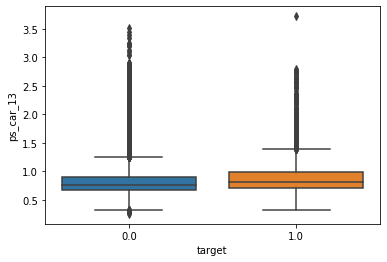

In [33]:
sns.boxplot(x='target',y='ps_car_13',data=df)
plt.show()

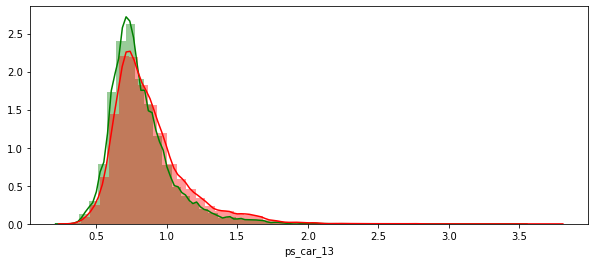

In [37]:
df0=df[df['target']==0]
df1=df[df['target']==1]

plt.figure(figsize=(10,4))
sns.distplot(df0['ps_car_13'],color='g')
sns.distplot(df1['ps_car_13'],color='r')
plt.show()


#### ps_car_04_cat(bin vs categorical)

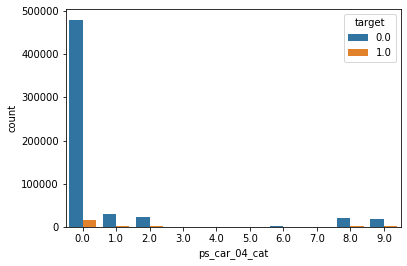

In [39]:
sns.countplot(x='ps_car_04_cat',hue='target',data=df)
plt.show()

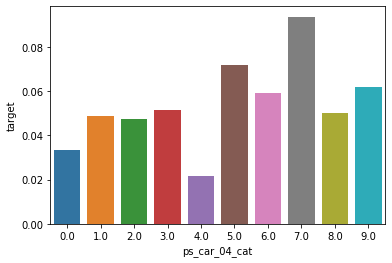

In [41]:
sns.barplot(x='ps_car_04_cat',y='target',data=df,ci=0)  # ci means confidence interval
plt.show()

the chart shows that proportion of target-1 for categoriy 1  is arount .05(5%). this suggest that category-4 is laest rysky and cate-7 is most risky.

In [43]:
#### chek no. of categories in the categorical features

for col in cat_cols:
    print('number of categories in: ',col, df[col].nunique())

number of categories in:  ps_ind_02_cat 4
number of categories in:  ps_ind_04_cat 2
number of categories in:  ps_ind_05_cat 7
number of categories in:  ps_car_01_cat 12
number of categories in:  ps_car_02_cat 2
number of categories in:  ps_car_04_cat 10
number of categories in:  ps_car_06_cat 18
number of categories in:  ps_car_07_cat 2
number of categories in:  ps_car_08_cat 2
number of categories in:  ps_car_09_cat 5
number of categories in:  ps_car_10_cat 3
number of categories in:  ps_car_11_cat 104


In [46]:
!pip install category-encoders

In [47]:
from category_encoders import TargetEncoder

In [48]:
y=df['target']
X=df.drop(['id','target'],axis=1)

In [51]:
enc=TargetEncoder(cols=['ps_car_11_cat'])
X=enc.fit_transform(X,y)

In [52]:
cat_cols=list(set(cat_cols)-set(['ps_car_11_cat']))
cat_cols

['ps_car_02_cat',
 'ps_ind_02_cat',
 'ps_car_10_cat',
 'ps_car_09_cat',
 'ps_ind_04_cat',
 'ps_car_01_cat',
 'ps_car_08_cat',
 'ps_car_07_cat',
 'ps_car_06_cat',
 'ps_ind_05_cat',
 'ps_car_04_cat']

In [53]:
X = pd.get_dummies(X,columns=cat_cols,drop_first=True)

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 100 columns):
ps_ind_01             595212 non-null float64
ps_ind_03             595212 non-null float64
ps_ind_06_bin         595212 non-null float64
ps_ind_07_bin         595212 non-null float64
ps_ind_08_bin         595212 non-null float64
ps_ind_09_bin         595212 non-null float64
ps_ind_10_bin         595212 non-null float64
ps_ind_11_bin         595212 non-null float64
ps_ind_12_bin         595212 non-null float64
ps_ind_13_bin         595212 non-null float64
ps_ind_14             595212 non-null float64
ps_ind_15             595212 non-null float64
ps_ind_16_bin         595212 non-null float64
ps_ind_17_bin         595212 non-null float64
ps_ind_18_bin         595212 non-null float64
ps_reg_01             595212 non-null float64
ps_reg_02             595212 non-null float64
ps_reg_03             595212 non-null float64
ps_car_11_cat         595212 non-null float64
ps_car_11     

### Building Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1,max_depth=5,max_leaf_nodes=10)

dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [57]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

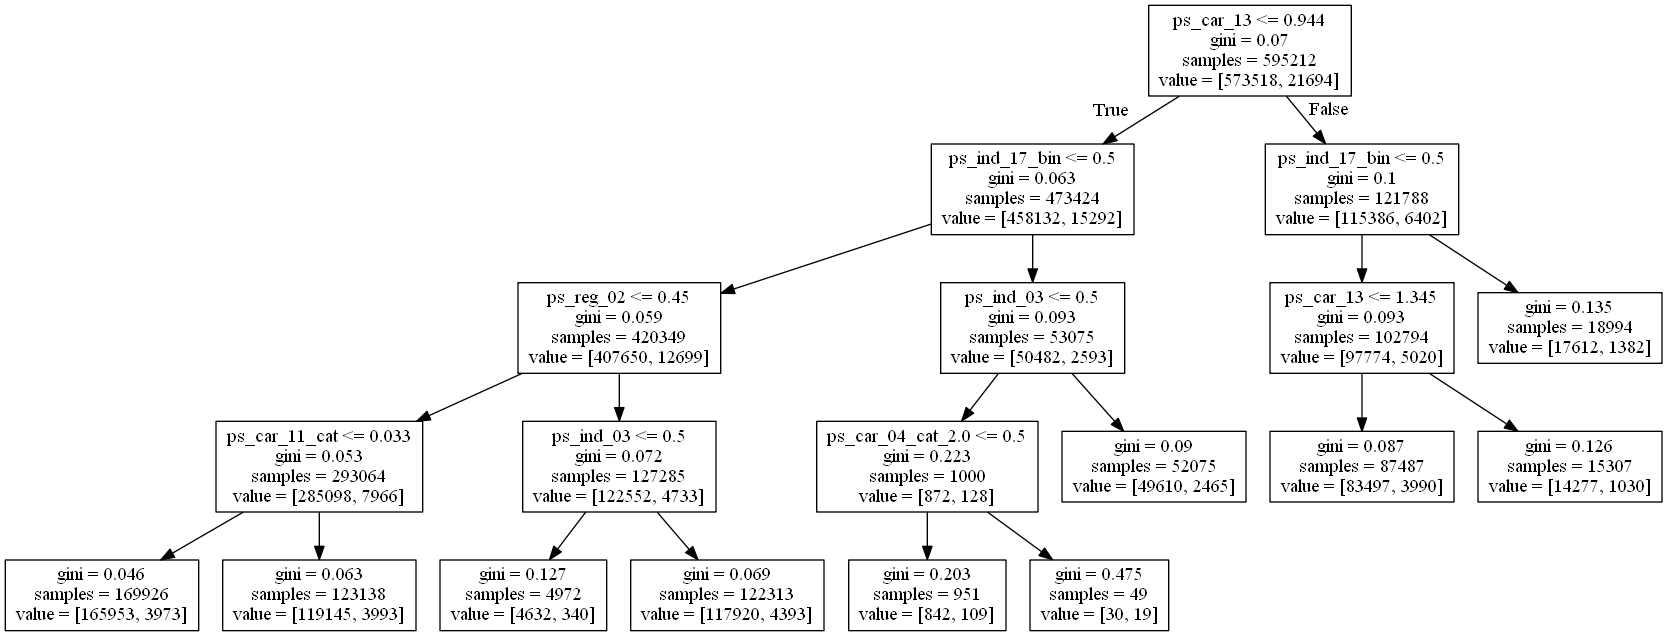

In [58]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data=export_graphviz(dtc,out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### model Building - Statistics

In [80]:
import statsmodels.api as sm

X=X.assign(const=1)
X=Xn.copy()

In [79]:
Xn=X.drop(['ps_ind_06_bin','ps_ind_10_bin',],axis=1)

In [81]:
import statsmodels.api as sm

X=X.assign(const=1)

logit=sm.Logit(y,X).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.152560
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               595212
Model:                          Logit   Df Residuals:                   595113
Method:                           MLE   Df Model:                           98
Date:                Thu, 09 Jan 2020   Pseudo R-squ.:                 0.02508
Time:                        16:58:12   Log-Likelihood:                -90805.
converged:                       True   LL-Null:                       -93142.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ps_ind_01              0.0109      0.004      2.770      0.006       0.003       0.019
ps_ind_03              0.0229      0.003      7.405      0.000       0.017       0.029
ps_ind_07_bin          0.2321      0.022     10.749      0.000       0.190       0.274
ps_ind_08_bin          0.2162      0.023      9.366      0.000       0.171       0.261
ps_ind_09_bin          0.0290      0.023      1.258      0.208      -0.016       0.074
ps_ind_11_bin          0.0749      0.344      0.218      0.828      -0.600       0.749
ps_ind_12_bin          0.1988      0.313      0.634      0.526      -0.415       0.813
ps_ind_13_bin          0.1321      0.372      0.355      0.722      -0.597       0.861
ps_ind_14             -0.1725      0.302     -0.572      0.567      -0.764       0.419
ps_ind_15             -0.0285      0.002    -12.535      0.000      -0.033      -0.024
ps_ind_16_bin         -0.0927      0.030     -3.141      0.002      -0.151      -0.035
ps_ind_17_bin          0.2877      0.033      8.683      0.000       0.223       0.353
ps_ind_18_bin         -0.0654      0.035     -1.878      0.060      -0.134       0.003
ps_reg_01              0.2764      0.031      8.884      0.000       0.215       0.337
ps_reg_02              0.0972      0.025      3.888      0.000       0.048       0.146
ps_reg_03              0.0766      0.027      2.855      0.004       0.024       0.129
ps_car_11_cat         11.9754      1.129     10.603      0.000       9.762      14.189
ps_car_11              0.0026      0.011      0.226      0.821      -0.020       0.025
ps_car_12              0.4341      0.212      2.043      0.041       0.018       0.851
ps_car_13              0.4459      0.075      5.973      0.000       0.300       0.592
ps_car_14             -1.2492      0.198     -6.313      0.000      -1.637      -0.861
ps_car_15              0.0679      0.016      4.235      0.000       0.036       0.099
ps_calc_01             0.0342      0.024      1.414      0.157      -0.013       0.082
ps_calc_02             0.0248      0.024      1.023      0.306      -0.023       0.072
ps_calc_03             0.0352      0.024      1.455      0.146      -0.012       0.083
ps_calc_04            -0.0002      0.006     -0.040      0.968      -0.012       0.012
ps_calc_05             0.0042      0.006      0.687      0.492      -0.008       0.016
ps_calc_06             0.0002      0.005      0.029      0.977      -0.010       0.010
ps_calc_07          1.754e-05      0.005      0.004      0.997      -0.010       0.010
ps_calc_08            -0.0039      0.005     -0.819      0.413      -0.013       0.005
ps_calc_09             0.0021      0.006      0.369      0.712      -0.009       0.013
ps_calc_10             0.0019      0.002      0.795      0.427      -0.003       0.007
ps_calc_11             0.0012      0.003      0.416      0.677      -0.005       0.007
ps_calc_12            -0.0048      0.006     -0.827      0.408      -0.016       0.007
ps_calc_13            

### Model Building -Machine Learning

In [82]:
from sklearn.metrics import roc_auc_score, accuracy_score , confusion_matrix

In [83]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train, y_train)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [85]:
print('Accuracy score of Train:',accuracy_score(y_train,y_train_pred))
print('Accuracy score of Test:',accuracy_score(y_test,y_test_pred))

print('AUC of Train:',roc_auc_score(y_train,y_train_prob))
print('AUC of Test:',roc_auc_score(y_test,y_test_prob))

Accuracy score of Train: 0.9911482677686614
Accuracy score of Test: 0.9637307809795337
AUC of Train: 0.9999186098749124
AUC of Test: 0.53099500440794
